# Aufgabe 2 - Tiefe Einblicke ins Institut

Den Code immer nachvollziehbar kommentieren! Bitte beachtet, dass das Notebook von Anfang bis Ende ohne Fehler durchlaufen muss und dass die requirements.txt Datei aktualisiert wird. 

In [5]:
import os
import random

## Teilaufgabe a): Trainings-und Testdatenset

In [ ]:
# Set random seed for reproducibility
random.seed(123)

# Define the class subdirectories
class_directories = ['Flur', 'Professorenbuero', 'Teekueche', 'Labor']
all_images = []

# Collect all image files with their relative paths from each class directory
for class_dir in class_directories:
    class_path = os.path.join('./Bilder', class_dir)
    
    # Check if the directory exists
    if os.path.exists(class_path):
        for filename in os.listdir(class_path):
            relative_path = os.path.join('./Bilder', class_dir, filename)
            all_images.append(relative_path)
        
        # Print number of images per class
        class_images = os.listdir(class_path)
        print(f"Images in {class_dir}: {len(class_images)}")
    else:
        print(f"Warning: Directory {class_path} does not exist!")

print(f"\nTotal number of images found: {len(all_images)}")

# Shuffle the list to ensure random distribution across classes
random.shuffle(all_images)

# Calculate split index for 80/20 split
split_index = int(0.8 * len(all_images))

# Split into training (80%) and test (20%) sets
training_path_list = all_images[:split_index]
test_path_list = all_images[split_index:]

print(f"\nTraining set size: {len(training_path_list)} images ({len(training_path_list)/len(all_images)*100:.1f}%)")
print(f"Test set size: {len(test_path_list)} images ({len(test_path_list)/len(all_images)*100:.1f}%)")


def count_classes_in_set(image_list, set_name):
    """Analyze class distribution in training and test sets."""
    class_counts = {class_dir: 0 for class_dir in class_directories}
    
    for image_path in image_list:
        for class_dir in class_directories:
            if class_dir in image_path:
                class_counts[class_dir] += 1
                break
    
    print(f"\n{set_name} set class distribution:")
    for class_dir, count in class_counts.items():
        percentage = (count / len(image_list)) * 100 if len(image_list) > 0 else 0
        print(f"  {class_dir}: {count} images ({percentage:.1f}%)")

count_classes_in_set(training_path_list, "Training")
count_classes_in_set(test_path_list, "Test")

Images in Flur: 25
Images in Professorenbuero: 25
Images in Teekueche: 25
Images in Labor: 25

Total number of images found: 100

Training set size: 80 images (80.0%)
Test set size: 20 images (20.0%)

Training set class distribution:
  Flur: 19 images (23.8%)
  Professorenbuero: 20 images (25.0%)
  Teekueche: 22 images (27.5%)
  Labor: 19 images (23.8%)

Test set class distribution:
  Flur: 6 images (30.0%)
  Professorenbuero: 5 images (25.0%)
  Teekueche: 3 images (15.0%)
  Labor: 6 images (30.0%)


## Teilaufgabe b): Verteilung RGB

Extracting RGB values from training images...


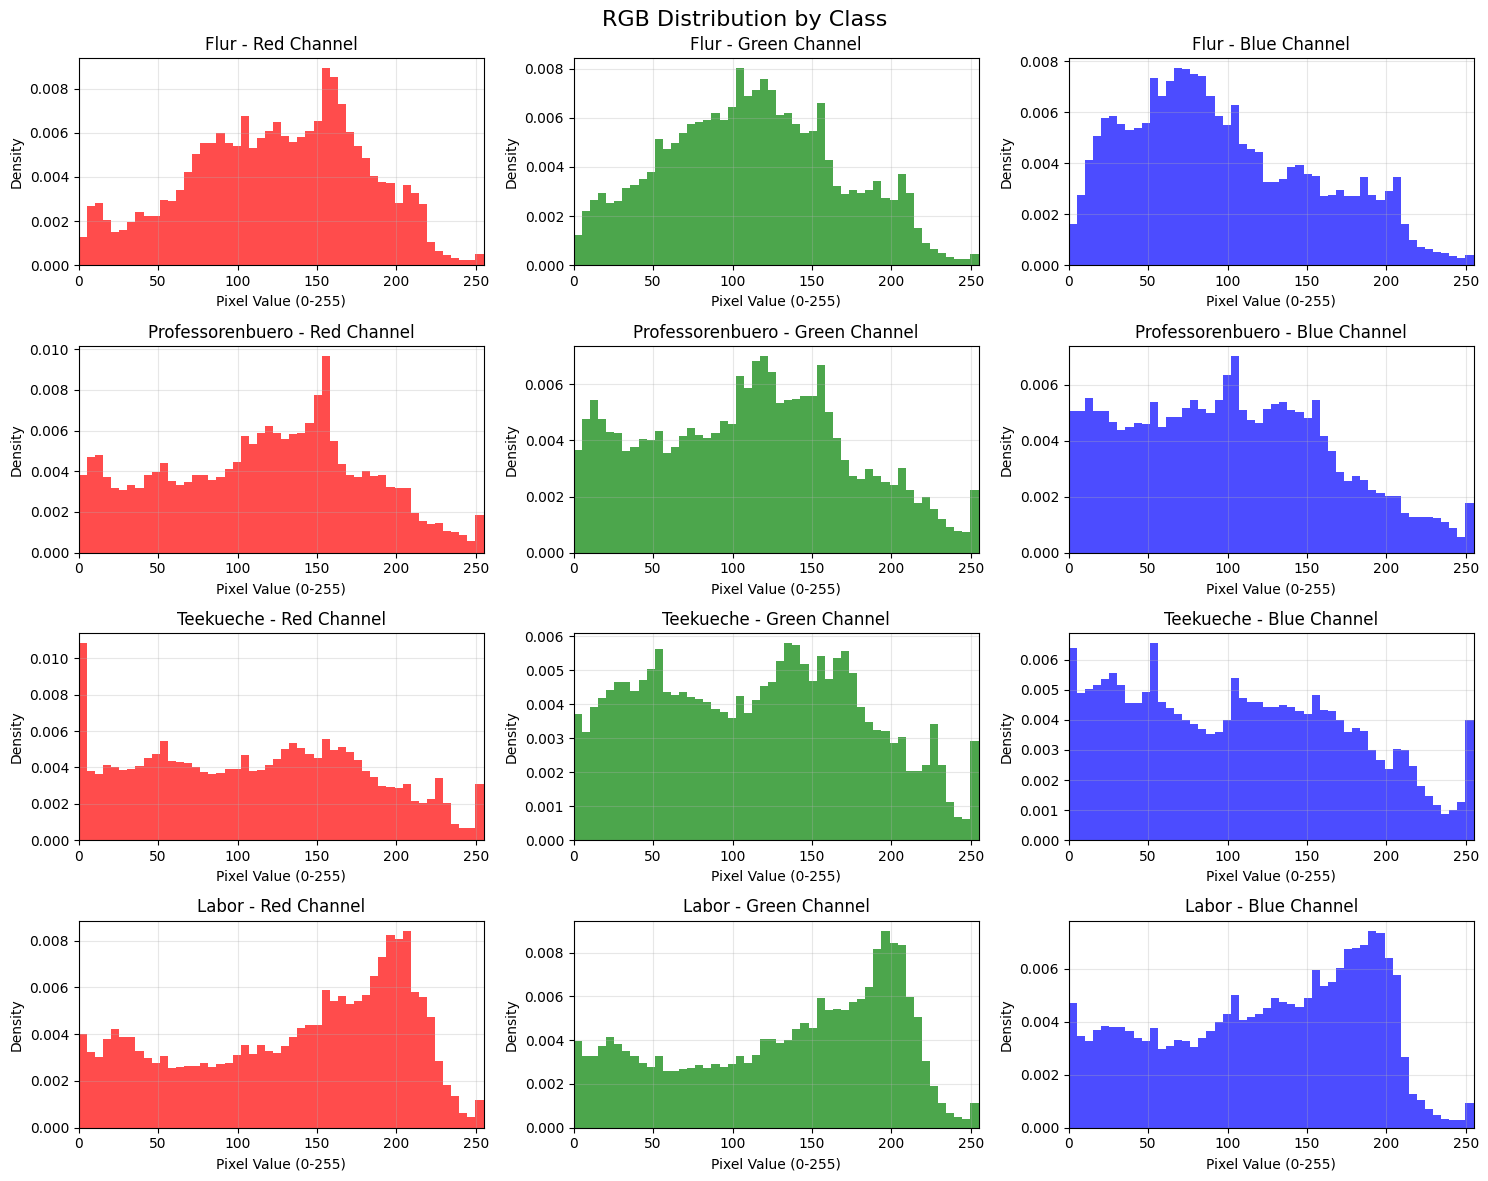

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def extract_rgb_values(image_path):
    """
    Extract RGB values from an image.
    
    Parameters:
    ----------
    image_path : str
        Path to the image file
        
    Returns:
    -------
    tuple
        Tuple containing (r_values, g_values, b_values) as flattened arrays
    """
    try:
        # Load image and convert to RGB
        img = Image.open(image_path).convert('RGB')
        img_array = np.array(img)
        
        # Extract RGB channels and flatten
        r_values = img_array[:, :, 0].flatten()
        g_values = img_array[:, :, 1].flatten()
        b_values = img_array[:, :, 2].flatten()
        
        return r_values, g_values, b_values
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None, None, None

def get_class_from_path(image_path):
    """Extract class name from image path."""
    for class_dir in class_directories:
        if class_dir in image_path:
            return class_dir
    return 'Unknown'

# Collect RGB values for each class
print("Extracting RGB values from training images...")
rgb_data_by_class = {class_dir: {'r': [], 'g': [], 'b': []} for class_dir in class_directories}

for image_path in training_path_list:
    class_name = get_class_from_path(image_path)
    
    r_values, g_values, b_values = extract_rgb_values(image_path)
    
    if r_values is not None:
        rgb_data_by_class[class_name]['r'].extend(r_values)
        rgb_data_by_class[class_name]['g'].extend(g_values)
        rgb_data_by_class[class_name]['b'].extend(b_values)

# Create histograms for each class
fig, axes = plt.subplots(len(class_directories), 3, figsize=(15, 12))
fig.suptitle('RGB Distribution by Class', fontsize=16)

colors = ['red', 'green', 'blue']
channels = ['r', 'g', 'b']
channel_names = ['Red', 'Green', 'Blue']

for i, class_name in enumerate(class_directories):
    for j, (channel, color, channel_name) in enumerate(zip(channels, colors, channel_names)):
        ax = axes[i, j]
        
        # Plot histogram
        rgb_values = rgb_data_by_class[class_name][channel]
        if len(rgb_values) > 0:
            ax.hist(rgb_values, bins=50, color=color, alpha=0.7, density=True)
            ax.set_title(f'{class_name} - {channel_name} Channel')
            ax.set_xlabel('Pixel Value (0-255)')
            ax.set_ylabel('Density')
            ax.grid(True, alpha=0.3)
            ax.set_xlim(0, 255)
        else:
            ax.text(0.5, 0.5, 'No data', ha='center', va='center', transform=ax.transAxes)

plt.tight_layout()
plt.show()

## Teilaufgabe c): Training und Test mit Random Forest 

Extracting enhanced features from training images...
Processing training image 1/80
Processing training image 2/80
Processing training image 3/80
Processing training image 4/80
Processing training image 5/80
Processing training image 6/80
Processing training image 7/80
Processing training image 8/80
Processing training image 9/80
Processing training image 10/80
Processing training image 11/80
Processing training image 12/80
Processing training image 13/80
Processing training image 14/80
Processing training image 15/80
Processing training image 16/80
Processing training image 17/80
Processing training image 18/80
Processing training image 19/80
Processing training image 20/80
Processing training image 21/80
Processing training image 22/80
Processing training image 23/80
Processing training image 24/80
Processing training image 25/80
Processing training image 26/80
Processing training image 27/80
Processing training image 28/80
Processing training image 29/80
Processing training image 30

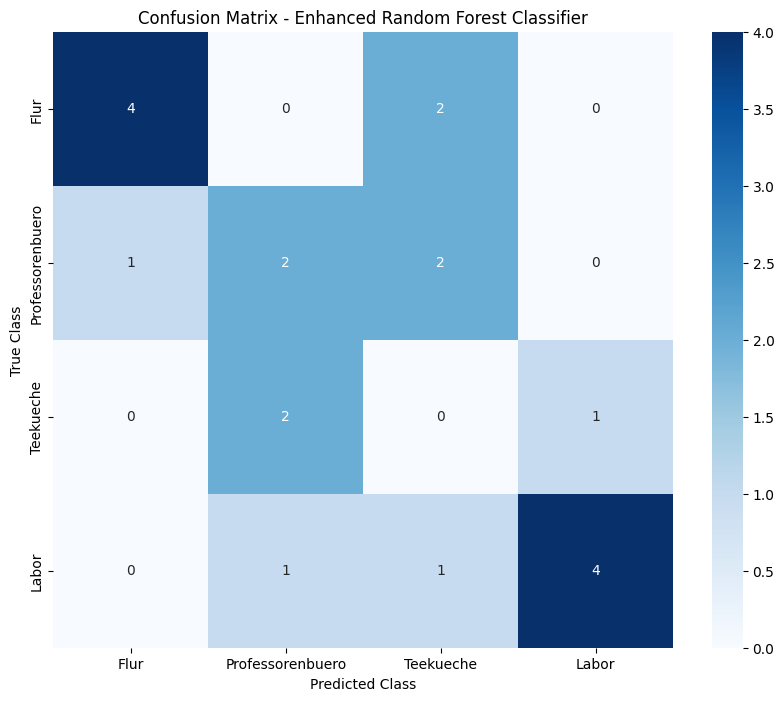


--- Top 20 Most Important Features ---


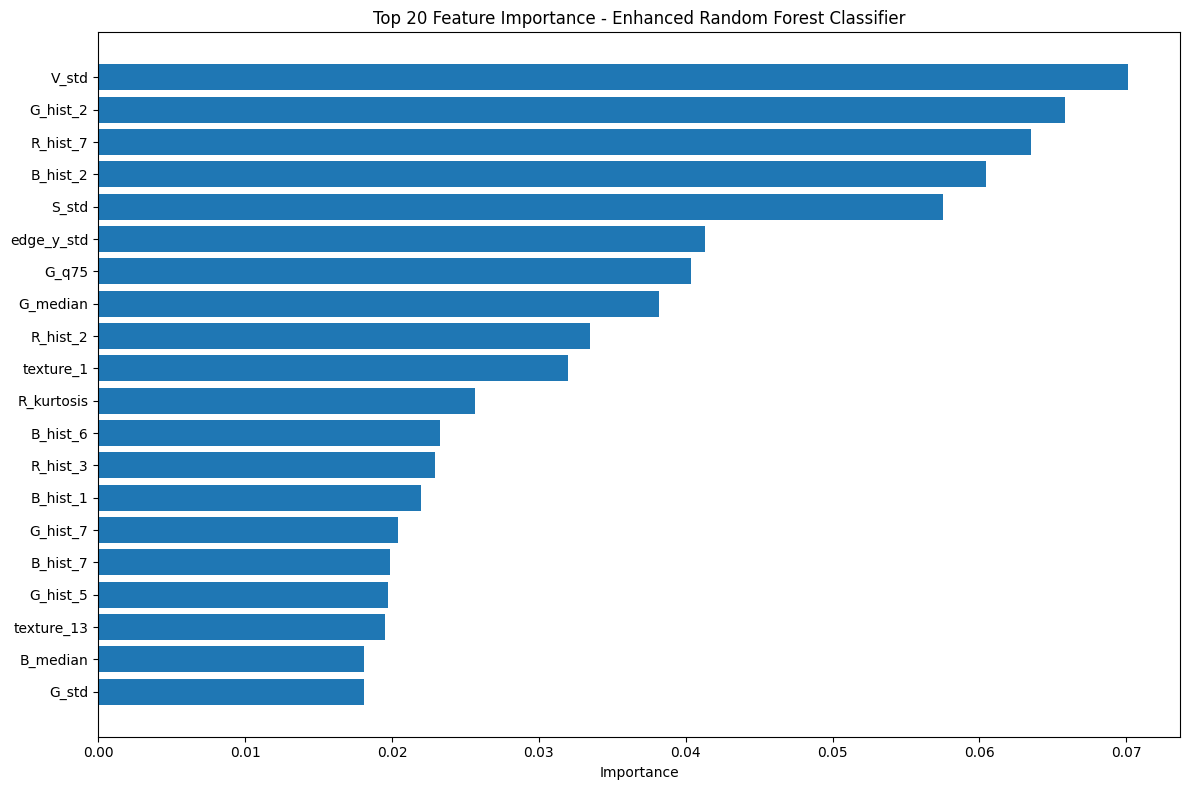


--- Prediction Examples ---
Test predictions:
 1. True: Labor           | Pred: Professorenbuero ✗
 2. True: Professorenbuero | Pred: Teekueche       ✗
 3. True: Labor           | Pred: Teekueche       ✗
 4. True: Labor           | Pred: Labor           ✓
 5. True: Labor           | Pred: Labor           ✓
 6. True: Flur            | Pred: Teekueche       ✗
 7. True: Flur            | Pred: Flur            ✓
 8. True: Labor           | Pred: Labor           ✓
 9. True: Professorenbuero | Pred: Teekueche       ✗
10. True: Professorenbuero | Pred: Professorenbuero ✓
11. True: Teekueche       | Pred: Professorenbuero ✗
12. True: Teekueche       | Pred: Labor           ✗
13. True: Professorenbuero | Pred: Professorenbuero ✓
14. True: Flur            | Pred: Flur            ✓
15. True: Flur            | Pred: Flur            ✓
16. True: Labor           | Pred: Labor           ✓
17. True: Teekueche       | Pred: Professorenbuero ✗
18. True: Flur            | Pred: Flur            ✓
19. True

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report
import seaborn as sns
from scipy import stats

def extract_enhanced_features(image_path):
    """
    Extract enhanced features from an image for better classification.
    
    Parameters:
    ----------
    image_path : str
        Path to the image file
        
    Returns:
    -------
    list
        List of enhanced features including color statistics, histograms, and texture measures
    """
    try:
        # Load image and convert to RGB
        img = Image.open(image_path).convert('RGB')
        # Resize to consistent size for feature extraction
        img = img.resize((128, 128))
        img_array = np.array(img)
        
        # Extract RGB channels
        r_channel = img_array[:, :, 0].flatten()
        g_channel = img_array[:, :, 1].flatten()
        b_channel = img_array[:, :, 2].flatten()
        
        features = []
        
        # Basic statistical features for each channel
        for channel in [r_channel, g_channel, b_channel]:
            features.extend([
                np.mean(channel),           # Mean
                np.std(channel),            # Standard deviation
                np.min(channel),            # Minimum
                np.max(channel),            # Maximum
                np.median(channel),         # Median
                stats.skew(channel),        # Skewness
                stats.kurtosis(channel),    # Kurtosis
                np.percentile(channel, 25), # 25th percentile
                np.percentile(channel, 75)  # 75th percentile
            ])
        
        # Color histogram features (simplified)
        # Divide each channel into bins and count occurrences
        hist_bins = 8  # Reduce bins to keep feature count manageable
        for channel in [r_channel, g_channel, b_channel]:
            hist, _ = np.histogram(channel, bins=hist_bins, range=(0, 255))
            # Normalize histogram
            hist = hist / len(channel)
            features.extend(hist)
        
        # Convert to grayscale for texture features
        gray = np.dot(img_array[...,:3], [0.2989, 0.5870, 0.1140])
        
        # Simple texture features using local standard deviation
        # Divide image into 4x4 grid and calculate std dev in each cell
        h, w = gray.shape
        grid_size = 4
        cell_h, cell_w = h // grid_size, w // grid_size
        
        for i in range(grid_size):
            for j in range(grid_size):
                start_h = i * cell_h
                end_h = min((i + 1) * cell_h, h)
                start_w = j * cell_w
                end_w = min((j + 1) * cell_w, w)
                
                cell = gray[start_h:end_h, start_w:end_w]
                features.append(np.std(cell))  # Local texture measure
        
        # Edge detection features
        # Simple gradient-based edge detection
        grad_x = np.abs(np.diff(gray, axis=1))
        grad_y = np.abs(np.diff(gray, axis=0))
        
        features.extend([
            np.mean(grad_x),  # Average horizontal gradient
            np.std(grad_x),   # Std of horizontal gradient
            np.mean(grad_y),  # Average vertical gradient
            np.std(grad_y)    # Std of vertical gradient
        ])
        
        # HSV color space features
        from colorsys import rgb_to_hsv
        hsv_features = []
        for i in range(0, len(r_channel), max(1, len(r_channel)//1000)):  # Sample pixels
            r, g, b = r_channel[i]/255.0, g_channel[i]/255.0, b_channel[i]/255.0
            h, s, v = rgb_to_hsv(r, g, b)
            hsv_features.extend([h, s, v])
        
        # Calculate HSV statistics
        if hsv_features:
            hsv_array = np.array(hsv_features).reshape(-1, 3)
            for channel_idx in range(3):  # H, S, V
                channel_data = hsv_array[:, channel_idx]
                features.extend([
                    np.mean(channel_data),
                    np.std(channel_data)
                ])
        else:
            features.extend([0] * 6)  # Fallback if HSV calculation fails
        
        return features
        
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

def get_class_label(image_path):
    """Extract class label from image path."""
    for i, class_dir in enumerate(class_directories):
        if class_dir in image_path:
            return i  # Return numeric label
    return -1  # Unknown class

# Extract enhanced features from training data
print("Extracting enhanced features from training images...")

X_train = []
y_train = []

for i, image_path in enumerate(training_path_list):
    print(f"Processing training image {i+1}/{len(training_path_list)}")
    
    features = extract_enhanced_features(image_path)
    label = get_class_label(image_path)
    
    if features is not None and label != -1:
        X_train.append(features)
        y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)

print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")

# Extract enhanced features from test data
print("Extracting enhanced features from test images...")
X_test = []
y_test = []

for i, image_path in enumerate(test_path_list):
    print(f"Processing test image {i+1}/{len(test_path_list)}")
    
    features = extract_enhanced_features(image_path)
    label = get_class_label(image_path)
    
    if features is not None and label != -1:
        X_test.append(features)
        y_test.append(label)

X_test = np.array(X_test)
y_test = np.array(y_test)

print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")

# Create feature names for reference
feature_names = []
# RGB statistical features
for color in ['R', 'G', 'B']:
    for stat in ['mean', 'std', 'min', 'max', 'median', 'skew', 'kurtosis', 'q25', 'q75']:
        feature_names.append(f'{color}_{stat}')

# RGB histogram features
for color in ['R', 'G', 'B']:
    for i in range(8):
        feature_names.append(f'{color}_hist_{i}')

# Texture features (4x4 grid)
for i in range(16):
    feature_names.append(f'texture_{i}')

# Edge features
feature_names.extend(['edge_x_mean', 'edge_x_std', 'edge_y_mean', 'edge_y_std'])

# HSV features
for color in ['H', 'S', 'V']:
    for stat in ['mean', 'std']:
        feature_names.append(f'{color}_{stat}')

print(f"\nTotal features extracted: {len(feature_names)}")
print(f"Feature categories:")
print(f"  - RGB statistics: 27 features")
print(f"  - RGB histograms: 24 features") 
print(f"  - Texture measures: 16 features")
print(f"  - Edge features: 4 features")
print(f"  - HSV features: 6 features")

# Train Random Forest Classifier with enhanced features
print("\nTraining Random Forest Classifier with enhanced features...")
rf_classifier = RandomForestClassifier(
    n_estimators=10,
    random_state=123,   # For reproducibility
    max_depth=15,       
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt' # Use sqrt of features at each split
)

# Fit the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

# Print results
print(f"\n--- Enhanced Random Forest Classification Results ---")
print(f"Accuracy:  {accuracy:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"Precision: {precision:.4f}")

# Detailed classification report
print(f"\n--- Detailed Classification Report ---")
print(classification_report(y_test, y_pred, target_names=class_directories))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_directories, 
            yticklabels=class_directories)
plt.title('Confusion Matrix - Enhanced Random Forest Classifier')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# Feature importance analysis
feature_importance = rf_classifier.feature_importances_
importance_df = list(zip(feature_names, feature_importance))
importance_df.sort(key=lambda x: x[1], reverse=True)

print(f"\n--- Top 20 Most Important Features ---")

# Plot top feature importance
plt.figure(figsize=(12, 8))
top_features = importance_df[:20]
features, importances = zip(*top_features)
plt.barh(range(len(features)), importances)
plt.yticks(range(len(features)), features)
plt.xlabel('Importance')
plt.title('Top 20 Feature Importance - Enhanced Random Forest Classifier')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Display prediction examples
print(f"\n--- Prediction Examples ---")
print("Test predictions:")
for i in range(len(y_test)):
    true_class = class_directories[y_test[i]]
    pred_class = class_directories[y_pred[i]]
    correct = "✓" if y_test[i] == y_pred[i] else "✗"
    print(f"{i+1:2d}. True: {true_class:15} | Pred: {pred_class:15} {correct}")

# Additional analysis: Class-wise performance
print(f"\n--- Class-wise Performance Analysis ---")
for i, class_name in enumerate(class_directories):
    class_mask = (y_test == i)
    class_predictions = y_pred[class_mask]
    class_accuracy = np.mean(class_predictions == i)
    class_count = np.sum(class_mask)
    
    print(f"{class_name:15}: {class_count:3d} samples, accuracy: {class_accuracy:.4f}")

## Teilaufgabe d): Hyperparameteroptimierung

--- Hyperparameter Optimization ---
Optimizing n_estimators with 5-fold cross-validation...
Fitting 5 folds for each of 3 candidates, totalling 15 fits

Hyperparameter optimization completed in 76.11 seconds

--- Optimization Results ---
Best parameter: {'n_estimators': 1000}
Best cross-validation accuracy: 0.7625

--- Cross-Validation Results for all tested values ---
n_estimators=1000: 0.7625 (+/- 0.1458)
n_estimators=10000: 0.7625 (+/- 0.1458)
n_estimators=100000: 0.7625 (+/- 0.1458)

--- Training Optimized Random Forest ---
Using best parameter: n_estimators = 1000

--- Optimized Random Forest Results ---
Training time: 0.6536 seconds
Prediction time: 0.0189 seconds
Accuracy:  0.6000
F1-Score:  0.6110
Recall:    0.6000
Precision: 0.6275

--- Comparison with Baseline Model ---
Baseline Accuracy:  0.5000
Optimized Accuracy: 0.6000
Improvement: 0.1000

--- Detailed Classification Report (Optimized Model) ---
                  precision    recall  f1-score   support

            Flur  

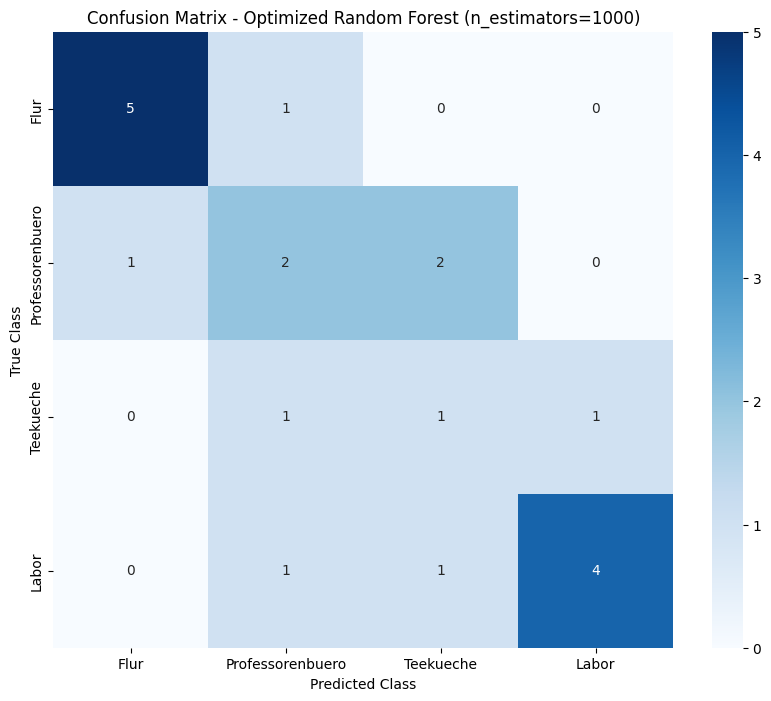


--- Feature Importance (Optimized Model) ---
S_std: 0.0665
edge_y_std: 0.0606
S_mean: 0.0345
R_std: 0.0307
G_std: 0.0289
B_std: 0.0261
G_hist_7: 0.0260
R_hist_7: 0.0259
edge_y_mean: 0.0254
V_std: 0.0251
G_hist_2: 0.0249
G_hist_3: 0.0244
B_hist_7: 0.0240
G_q75: 0.0216
B_hist_2: 0.0216
B_skew: 0.0202
H_mean: 0.0191
texture_15: 0.0188
R_q75: 0.0151
R_hist_3: 0.0148
R_kurtosis: 0.0147
texture_9: 0.0144
B_median: 0.0144
texture_4: 0.0143
G_median: 0.0134
B_hist_5: 0.0131
texture_14: 0.0128
G_hist_6: 0.0123
edge_x_std: 0.0120
G_skew: 0.0115
texture_13: 0.0111
H_std: 0.0107
G_kurtosis: 0.0107
G_mean: 0.0107
texture_2: 0.0102
B_hist_1: 0.0100
B_mean: 0.0100
texture_1: 0.0100
edge_x_mean: 0.0097
R_q25: 0.0096
texture_3: 0.0096
B_min: 0.0095
R_hist_6: 0.0087
texture_5: 0.0083
R_hist_2: 0.0079
R_min: 0.0077
G_hist_5: 0.0074
B_kurtosis: 0.0070
G_min: 0.0069
B_q75: 0.0068
B_q25: 0.0068
texture_10: 0.0067
texture_8: 0.0066
G_hist_1: 0.0066
R_hist_0: 0.0066
R_median: 0.0060
R_mean: 0.0058
texture_0:

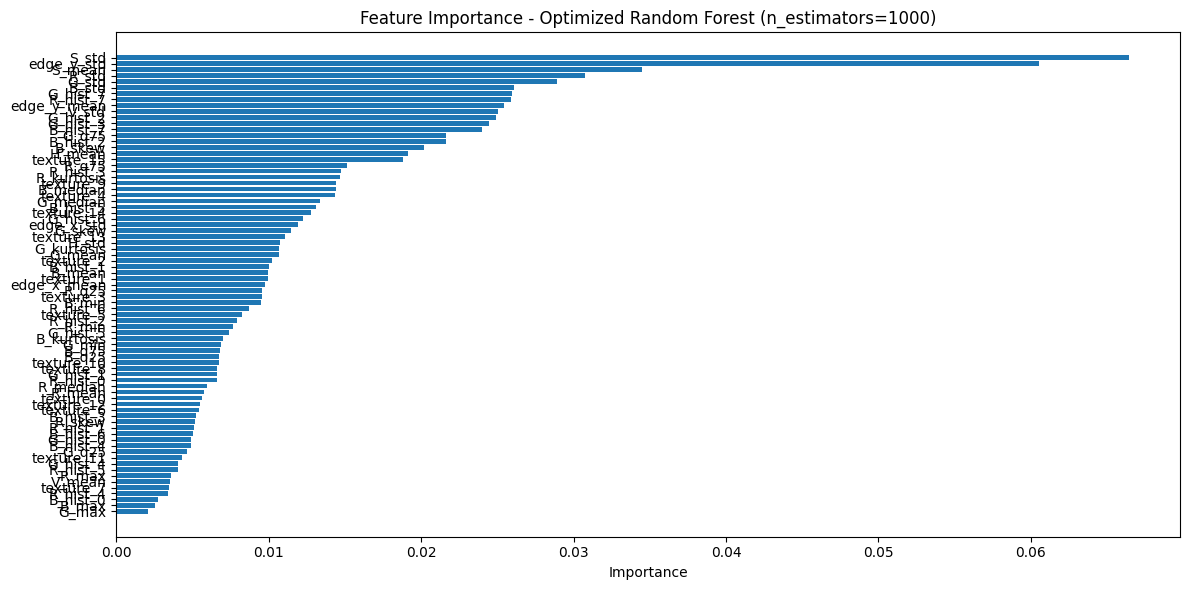


--- Final Cross-Validation Analysis ---
5-fold CV scores: [0.8125 0.6875 0.6875 0.875  0.75  ]
Mean CV accuracy: 0.7625 (+/- 0.1458)

--- Prediction Examples (Optimized Model) ---
First 10 test predictions:
 1. True: Labor           | Pred: Professorenbuero ✗
 2. True: Professorenbuero | Pred: Professorenbuero ✓
 3. True: Labor           | Pred: Teekueche       ✗
 4. True: Labor           | Pred: Labor           ✓
 5. True: Labor           | Pred: Labor           ✓
 6. True: Flur            | Pred: Professorenbuero ✗
 7. True: Flur            | Pred: Flur            ✓
 8. True: Labor           | Pred: Labor           ✓
 9. True: Professorenbuero | Pred: Teekueche       ✗
10. True: Professorenbuero | Pred: Professorenbuero ✓


In [28]:
from sklearn.model_selection import GridSearchCV, cross_val_score
import time

# Define hyperparameter grid
param_grid = {
    'n_estimators': [1000, 10000, 100000]  # Number of trees in the forest
}

print("--- Hyperparameter Optimization ---")
print("Optimizing n_estimators with 5-fold cross-validation...")

# Create Random Forest classifier with fixed other parameters
rf_base = RandomForestClassifier(
    random_state=123,   # For reproducibility
    max_depth=10,       
    min_samples_split=5,
    min_samples_leaf=2, 
    n_jobs=-1           # Use all available cores
)

# Setup GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation as requested
    scoring='accuracy',
    n_jobs=-1,          # Use all available cores
    verbose=1           # Show progress
)

# Measure training time
start_time = time.time()

# Fit the grid search
grid_search.fit(X_train, y_train)

training_time = time.time() - start_time

print(f"\nHyperparameter optimization completed in {training_time:.2f} seconds")

# Get best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"\n--- Optimization Results ---")
print(f"Best parameter: {best_params}")
print(f"Best cross-validation accuracy: {best_score:.4f}")

# Display all CV results
print(f"\n--- Cross-Validation Results for all tested values ---")
results = grid_search.cv_results_
for i, n_est in enumerate(param_grid['n_estimators']):
    mean_score = results['mean_test_score'][i]
    std_score = results['std_test_score'][i]
    print(f"n_estimators={n_est}: {mean_score:.4f} (+/- {std_score * 2:.4f})")

# Train final optimized model
print(f"\n--- Training Optimized Random Forest ---")
print(f"Using best parameter: n_estimators = {best_params['n_estimators']}")

optimized_rf = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    random_state=123,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2
)

# Fit the optimized model
start_time = time.time()
optimized_rf.fit(X_train, y_train)
fit_time = time.time() - start_time

# Make predictions on test set
start_time = time.time()
y_pred_optimized = optimized_rf.predict(X_test)
prediction_time = time.time() - start_time

# Calculate metrics for optimized model
accuracy_opt = accuracy_score(y_test, y_pred_optimized)
f1_opt = f1_score(y_test, y_pred_optimized, average='weighted')
recall_opt = recall_score(y_test, y_pred_optimized, average='weighted')
precision_opt = precision_score(y_test, y_pred_optimized, average='weighted')

print(f"\n--- Optimized Random Forest Results ---")
print(f"Training time: {fit_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")
print(f"Accuracy:  {accuracy_opt:.4f}")
print(f"F1-Score:  {f1_opt:.4f}")
print(f"Recall:    {recall_opt:.4f}")
print(f"Precision: {precision_opt:.4f}")

# Compare with baseline model from previous task
print(f"\n--- Comparison with Baseline Model ---")
print(f"Baseline Accuracy:  {accuracy:.4f}")
print(f"Optimized Accuracy: {accuracy_opt:.4f}")
print(f"Improvement: {accuracy_opt - accuracy:.4f}")

# Detailed classification report for optimized model
print(f"\n--- Detailed Classification Report (Optimized Model) ---")
print(classification_report(y_test, y_pred_optimized, target_names=class_directories))

# Create confusion matrix for optimized model
cm_opt = confusion_matrix(y_test, y_pred_optimized)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_opt, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_directories, 
            yticklabels=class_directories)
plt.title(f'Confusion Matrix - Optimized Random Forest (n_estimators={best_params["n_estimators"]})')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# Feature importance for optimized model
feature_importance_opt = optimized_rf.feature_importances_
importance_df_opt = list(zip(feature_names, feature_importance_opt))
importance_df_opt.sort(key=lambda x: x[1], reverse=True)

print(f"\n--- Feature Importance (Optimized Model) ---")
for feature, importance in importance_df_opt:
    print(f"{feature}: {importance:.4f}")

# Plot feature importance
plt.figure(figsize=(12, 6))
features_opt, importances_opt = zip(*importance_df_opt)
plt.barh(range(len(features_opt)), importances_opt)
plt.yticks(range(len(features_opt)), features_opt)
plt.xlabel('Importance')
plt.title(f'Feature Importance - Optimized Random Forest (n_estimators={best_params["n_estimators"]})')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Additional cross-validation analysis on the optimized model
print(f"\n--- Final Cross-Validation Analysis ---")
cv_scores = cross_val_score(optimized_rf, X_train, y_train, cv=5, scoring='accuracy')
print(f"5-fold CV scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Display prediction examples
print(f"\n--- Prediction Examples (Optimized Model) ---")
print("First 10 test predictions:")
for i in range(min(10, len(y_test))):
    true_class = class_directories[y_test[i]]
    pred_class = class_directories[y_pred_optimized[i]]
    correct = "✓" if y_test[i] == y_pred_optimized[i] else "✗"
    print(f"{i+1:2d}. True: {true_class:15} | Pred: {pred_class:15} {correct}")

## Teilaufgabe e): Dimensionalitätsreduktion

--- Dimensionality Reduction with PCA ---
Investigating the effect of PCA on classification performance...

Original feature space:
  Number of features: 77
  Training samples: 80
  Test samples: 20

--- Feature Standardization ---
Standardizing features before applying PCA...
Feature standardization completed.

--- PCA Analysis ---
Analyzing explained variance ratio...
Components needed for 80% variance: 12
Components needed for 90% variance: 19
Components needed for 95% variance: 26
Components needed for 99% variance: 40


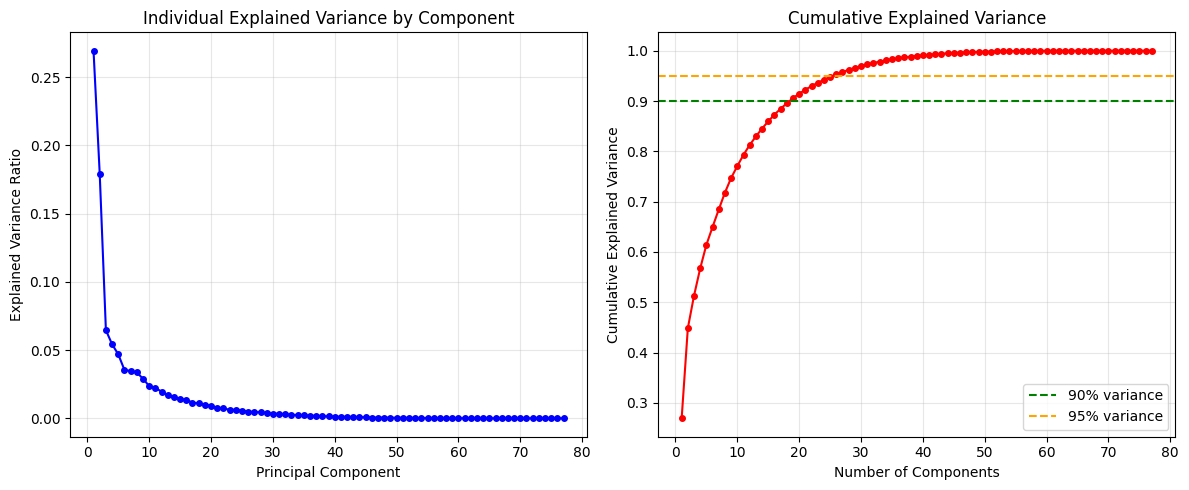


--- PCA Component Optimization ---
Testing different numbers of PCA components...
Testing PCA with components: [np.int64(12), np.int64(19), np.int64(26)]

--- Grid Search with PCA Pipeline ---
Testing 3 PCA components × 3 n_estimators
Total combinations: 9
Fitting 5 folds for each of 9 candidates, totalling 45 fits

--- PCA Optimization Completed ---
Total optimization time: 97.45 seconds

--- PCA Optimization Results ---
Best parameters: {'pca__n_components': np.int64(26), 'rf__n_estimators': 1000}
Best cross-validation accuracy: 0.7875

--- Cross-Validation Results for All PCA Combinations ---
PCA Comp.  n_est  CV Score   ±Std    
----------------------------------------
12         1000   0.7625    0.0468
12         10000  0.7625    0.0468
12         100000 0.7625    0.0468
19         1000   0.7625    0.0729
19         10000  0.7625    0.0729
19         100000 0.7625    0.0729
26         1000   0.7875    0.0750
26         10000  0.7750    0.0848
26         100000 0.7750    0.0848

-

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s


Making predictions with PCA model...

--- PCA + Random Forest Results ---
PCA components used: 26
Dimensionality reduction: 77 → 26 features
Reduction ratio: 66.2%

Training time:   0.5666 seconds
Prediction time: 0.0138 seconds

Performance Metrics:
  Accuracy:  0.8000
  F1-Score:  0.7961
  Recall:    0.8000
  Precision: 0.8346

--- Comparison: PCA vs Optimized vs Baseline ---
Model                Accuracy   F1-Score   Features  
-------------------------------------------------------
Baseline             0.5000    0.5364    77
Optimized            0.6000    0.6110    77
PCA + Optimized      0.8000    0.7961    26

Performance differences:
  PCA vs Baseline:  +0.3000 (+60.0%)
  PCA vs Optimized: +0.2000 (+33.3%)

--- Detailed Classification Report (PCA Model) ---
                  precision    recall  f1-score   support

            Flur       0.86      1.00      0.92         6
Professorenbuero       0.75      0.60      0.67         5
       Teekueche       0.60      1.00      0.75   

[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


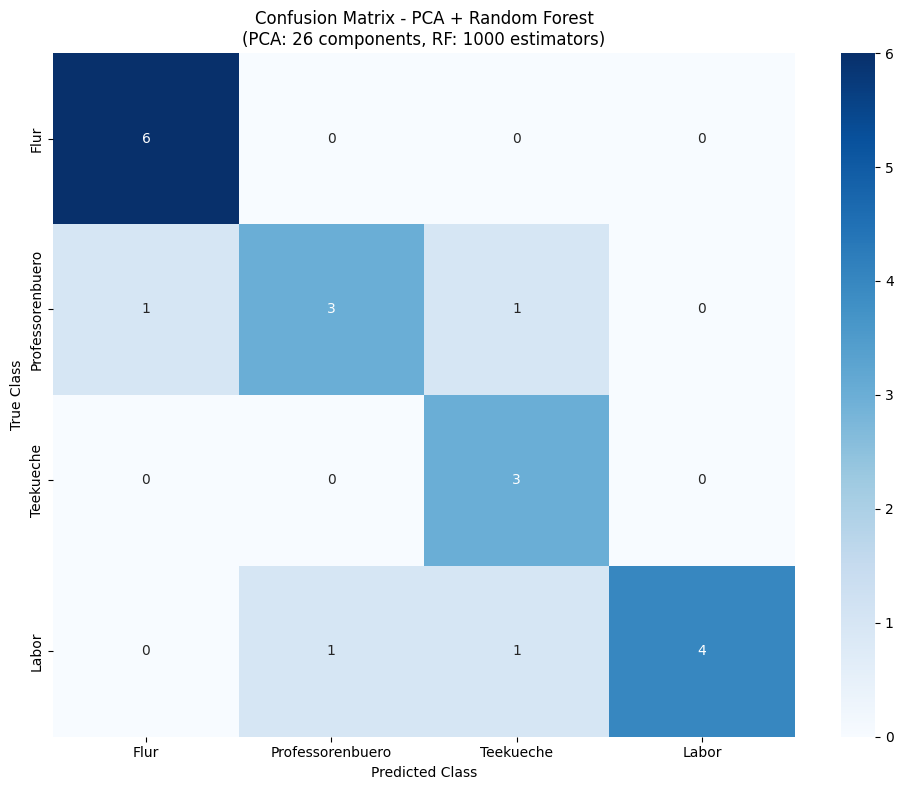


--- PCA Component Analysis ---
Explained variance by each component:
  PC1: 0.2694 (26.9%)
  PC2: 0.1792 (17.9%)
  PC3: 0.0646 (6.5%)
  PC4: 0.0543 (5.4%)
  PC5: 0.0469 (4.7%)
  PC6: 0.0355 (3.5%)
  PC7: 0.0347 (3.5%)
  PC8: 0.0336 (3.4%)
  PC9: 0.0291 (2.9%)
  PC10: 0.0236 (2.4%)
  PC11: 0.0224 (2.2%)
  PC12: 0.0195 (2.0%)
  PC13: 0.0170 (1.7%)
  PC14: 0.0157 (1.6%)
  PC15: 0.0142 (1.4%)
  PC16: 0.0135 (1.4%)
  PC17: 0.0115 (1.2%)
  PC18: 0.0110 (1.1%)
  PC19: 0.0100 (1.0%)
  PC20: 0.0091 (0.9%)
  PC21: 0.0077 (0.8%)
  PC22: 0.0073 (0.7%)
  PC23: 0.0063 (0.6%)
  PC24: 0.0062 (0.6%)
  PC25: 0.0057 (0.6%)
  PC26: 0.0050 (0.5%)

Total explained variance: 0.9529 (95.3%)

--- Feature Importance in PCA Space ---
Importance of principal components:
  PC1: 0.0653
  PC2: 0.1652
  PC3: 0.0244
  PC4: 0.1221
  PC5: 0.0245
  PC6: 0.0328
  PC7: 0.0348
  PC8: 0.0981
  PC9: 0.0210
  PC10: 0.0357
  PC11: 0.0218
  PC12: 0.0411
  PC13: 0.0226
  PC14: 0.0278
  PC15: 0.0221
  PC16: 0.0343
  PC17: 0.0214


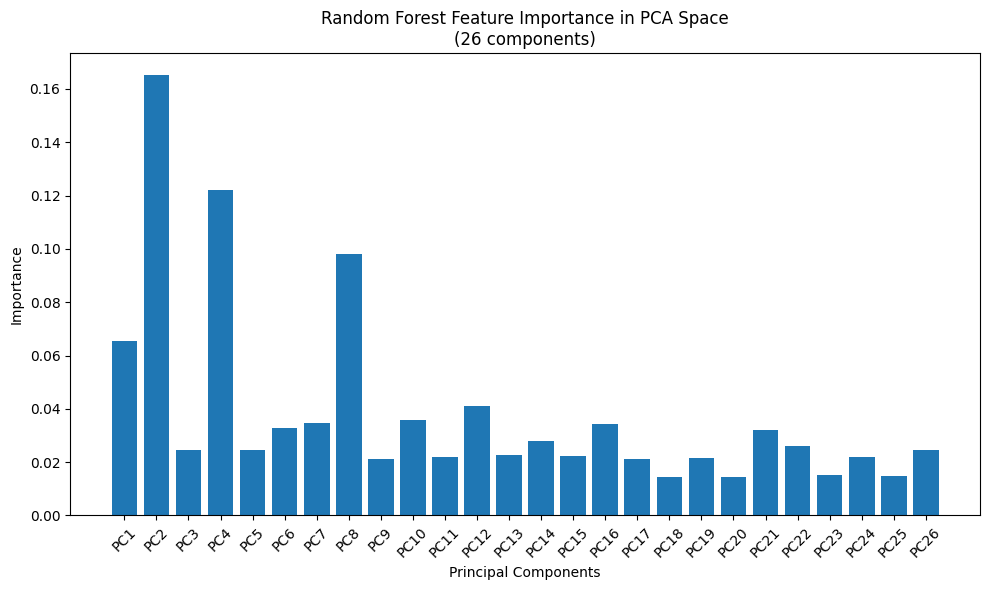


--- Final Cross-Validation Analysis (PCA Model) ---


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:

5-fold CV scores: [0.875  0.875  0.75   0.6875 0.75  ]
Mean CV accuracy: 0.7875 (±0.1500)

--- Prediction Examples (PCA Model) ---
First 10 test predictions:
 1. True: Labor           | Pred: Professorenbuero ✗
 2. True: Professorenbuero | Pred: Professorenbuero ✓
 3. True: Labor           | Pred: Teekueche       ✗
 4. True: Labor           | Pred: Labor           ✓
 5. True: Labor           | Pred: Labor           ✓
 6. True: Flur            | Pred: Flur            ✓
 7. True: Flur            | Pred: Flur            ✓
 8. True: Labor           | Pred: Labor           ✓
 9. True: Professorenbuero | Pred: Teekueche       ✗
10. True: Professorenbuero | Pred: Professorenbuero ✓

--- Dimensionality Reduction Summary ---
Original features: 77
PCA components: 26
Reduction: 51 features removed
Compression ratio: 0.34

Performance impact:
  ✓ PCA improved accuracy by 0.2000
  Variance retained: 95.3%
  Training time: 0.5666s (vs 0.5666s without PCA)


[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt

print("--- Dimensionality Reduction with PCA ---")
print("Investigating the effect of PCA on classification performance...")

# First, let's analyze the original feature space
print(f"\nOriginal feature space:")
print(f"  Number of features: {X_train.shape[1]}")
print(f"  Training samples: {X_train.shape[0]}")
print(f"  Test samples: {X_test.shape[0]}")

# Standardize features before PCA (important for PCA)
print("\n--- Feature Standardization ---")
print("Standardizing features before applying PCA...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature standardization completed.")

# Apply PCA to find optimal number of components
print("\n--- PCA Analysis ---")
print("Analyzing explained variance ratio...")

# Fit PCA with all components to analyze variance
pca_full = PCA()
pca_full.fit(X_train_scaled)

# Calculate cumulative explained variance
cumsum_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Find number of components for different variance thresholds
variance_thresholds = [0.80, 0.90, 0.95, 0.99]
components_for_variance = {}

for threshold in variance_thresholds:
    n_components = np.argmax(cumsum_variance >= threshold) + 1
    components_for_variance[threshold] = n_components
    print(f"Components needed for {threshold*100:.0f}% variance: {n_components}")

# Plot explained variance
plt.figure(figsize=(12, 5))

# Plot individual explained variance
plt.subplot(1, 2, 1)
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1), 
         pca_full.explained_variance_ratio_, 'bo-', markersize=4)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Individual Explained Variance by Component')
plt.grid(True, alpha=0.3)

# Plot cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumsum_variance) + 1), cumsum_variance, 'ro-', markersize=4)
plt.axhline(y=0.9, color='g', linestyle='--', label='90% variance')
plt.axhline(y=0.95, color='orange', linestyle='--', label='95% variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Test different numbers of PCA components
print("\n--- PCA Component Optimization ---")
print("Testing different numbers of PCA components...")

# Define component numbers to test (keeping it simple with 3 values as in task d)
component_options = [
    components_for_variance[0.80],  # 80% variance
    components_for_variance[0.90],  # 90% variance
    components_for_variance[0.95]   # 95% variance
]

print(f"Testing PCA with components: {component_options}")

# GridSearch for PCA + Random Forest
from sklearn.model_selection import GridSearchCV

# Create pipeline with PCA and Random Forest
pipeline = Pipeline([
    ('pca', PCA()),
    ('rf', RandomForestClassifier(
        random_state=123,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        n_jobs=-1
    ))
])

# Parameter grid for pipeline
param_grid_pca = {
    'pca__n_components': component_options,
    'rf__n_estimators': [1000, 10000, 100000]
}

print(f"\n--- Grid Search with PCA Pipeline ---")
print(f"Testing {len(component_options)} PCA components × {len(param_grid_pca['rf__n_estimators'])} n_estimators")
print(f"Total combinations: {len(component_options) * len(param_grid_pca['rf__n_estimators'])}")

# Setup GridSearchCV
grid_search_pca = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid_pca,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Measure training time
start_time = time.time()
grid_search_pca.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

print(f"\n--- PCA Optimization Completed ---")
print(f"Total optimization time: {training_time:.2f} seconds")

# Get best parameters
best_params_pca = grid_search_pca.best_params_
best_score_pca = grid_search_pca.best_score_

print(f"\n--- PCA Optimization Results ---")
print(f"Best parameters: {best_params_pca}")
print(f"Best cross-validation accuracy: {best_score_pca:.4f}")

# Display all CV results
print(f"\n--- Cross-Validation Results for All PCA Combinations ---")
results_pca = grid_search_pca.cv_results_

print(f"{'PCA Comp.':<10} {'n_est':<6} {'CV Score':<10} {'±Std':<8}")
print("-" * 40)

for i in range(len(results_pca['mean_test_score'])):
    pca_comp = results_pca['param_pca__n_components'][i]
    n_est = results_pca['param_rf__n_estimators'][i]
    mean_score = results_pca['mean_test_score'][i]
    std_score = results_pca['std_test_score'][i]
    
    print(f"{pca_comp:<10} {n_est:<6} {mean_score:.4f}    {std_score:.4f}")

# Train final optimized PCA model
print(f"\n--- Training Optimized PCA + Random Forest ---")
print(f"Using best parameters:")
print(f"  PCA components: {best_params_pca['pca__n_components']}")
print(f"  n_estimators: {best_params_pca['rf__n_estimators']}")

# Create final model with best parameters
final_pca_model = Pipeline([
    ('pca', PCA(n_components=best_params_pca['pca__n_components'])),
    ('rf', RandomForestClassifier(
        n_estimators=best_params_pca['rf__n_estimators'],
        random_state=123,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        verbose=1
    ))
])

# Fit the optimized model
print("\nTraining final PCA model...")
start_time = time.time()
final_pca_model.fit(X_train_scaled, y_train)
fit_time = time.time() - start_time

# Make predictions
print("Making predictions with PCA model...")
start_time = time.time()
y_pred_pca = final_pca_model.predict(X_test_scaled)
prediction_time = time.time() - start_time

# Calculate metrics for PCA model
accuracy_pca = accuracy_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca, average='weighted')
recall_pca = recall_score(y_test, y_pred_pca, average='weighted')
precision_pca = precision_score(y_test, y_pred_pca, average='weighted')

print(f"\n--- PCA + Random Forest Results ---")
print(f"PCA components used: {best_params_pca['pca__n_components']}")
print(f"Dimensionality reduction: {X_train.shape[1]} → {best_params_pca['pca__n_components']} features")
print(f"Reduction ratio: {(1 - best_params_pca['pca__n_components']/X_train.shape[1])*100:.1f}%")
print(f"")
print(f"Training time:   {fit_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")
print(f"")
print(f"Performance Metrics:")
print(f"  Accuracy:  {accuracy_pca:.4f}")
print(f"  F1-Score:  {f1_pca:.4f}")
print(f"  Recall:    {recall_pca:.4f}")
print(f"  Precision: {precision_pca:.4f}")

# Compare with optimized model from task d)
print(f"\n--- Comparison: PCA vs Optimized vs Baseline ---")
print(f"{'Model':<20} {'Accuracy':<10} {'F1-Score':<10} {'Features':<10}")
print("-" * 55)
print(f"{'Baseline':<20} {accuracy:.4f}    {f1:.4f}    {X_train.shape[1]}")
print(f"{'Optimized':<20} {accuracy_opt:.4f}    {f1_opt:.4f}    {X_train.shape[1]}")
print(f"{'PCA + Optimized':<20} {accuracy_pca:.4f}    {f1_pca:.4f}    {best_params_pca['pca__n_components']}")

# Performance differences
pca_vs_baseline = accuracy_pca - accuracy
pca_vs_optimized = accuracy_pca - accuracy_opt

print(f"\nPerformance differences:")
print(f"  PCA vs Baseline:  {pca_vs_baseline:+.4f} ({pca_vs_baseline/accuracy*100:+.1f}%)")
print(f"  PCA vs Optimized: {pca_vs_optimized:+.4f} ({pca_vs_optimized/accuracy_opt*100:+.1f}%)")

# Detailed classification report for PCA model
print(f"\n--- Detailed Classification Report (PCA Model) ---")
print(classification_report(y_test, y_pred_pca, target_names=class_directories))

# Create confusion matrix for PCA model
cm_pca = confusion_matrix(y_test, y_pred_pca)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_pca, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_directories, 
            yticklabels=class_directories)
plt.title(f'Confusion Matrix - PCA + Random Forest\n'
          f'(PCA: {best_params_pca["pca__n_components"]} components, '
          f'RF: {best_params_pca["rf__n_estimators"]} estimators)')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.tight_layout()
plt.show()

# Analyze PCA components
print(f"\n--- PCA Component Analysis ---")
pca_transformer = final_pca_model.named_steps['pca']
explained_variance = pca_transformer.explained_variance_ratio_

print(f"Explained variance by each component:")
for i, var in enumerate(explained_variance, 1):
    print(f"  PC{i}: {var:.4f} ({var*100:.1f}%)")

print(f"\nTotal explained variance: {np.sum(explained_variance):.4f} ({np.sum(explained_variance)*100:.1f}%)")

# Feature importance for PCA model (from Random Forest)
rf_pca = final_pca_model.named_steps['rf']
feature_importance_pca = rf_pca.feature_importances_

print(f"\n--- Feature Importance in PCA Space ---")
print("Importance of principal components:")
for i, importance in enumerate(feature_importance_pca, 1):
    print(f"  PC{i}: {importance:.4f}")

# Plot PCA component importance
plt.figure(figsize=(10, 6))
pc_names = [f'PC{i+1}' for i in range(len(feature_importance_pca))]
plt.bar(pc_names, feature_importance_pca)
plt.xlabel('Principal Components')
plt.ylabel('Importance')
plt.title(f'Random Forest Feature Importance in PCA Space\n'
          f'({best_params_pca["pca__n_components"]} components)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Cross-validation analysis
print(f"\n--- Final Cross-Validation Analysis (PCA Model) ---")
cv_scores_pca = cross_val_score(final_pca_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"5-fold CV scores: {cv_scores_pca}")
print(f"Mean CV accuracy: {cv_scores_pca.mean():.4f} (±{cv_scores_pca.std() * 2:.4f})")

# Display prediction examples
print(f"\n--- Prediction Examples (PCA Model) ---")
print("First 10 test predictions:")
for i in range(min(10, len(y_test))):
    true_class = class_directories[y_test[i]]
    pred_class = class_directories[y_pred_pca[i]]
    correct = "✓" if y_test[i] == y_pred_pca[i] else "✗"
    print(f"{i+1:2d}. True: {true_class:15} | Pred: {pred_class:15} {correct}")

# Summary of dimensionality reduction effects
print(f"\n--- Dimensionality Reduction Summary ---")
print(f"Original features: {X_train.shape[1]}")
print(f"PCA components: {best_params_pca['pca__n_components']}")
print(f"Reduction: {X_train.shape[1] - best_params_pca['pca__n_components']} features removed")
print(f"Compression ratio: {best_params_pca['pca__n_components']/X_train.shape[1]:.2f}")
print(f"")
print(f"Performance impact:")
if pca_vs_optimized >= 0:
    print(f"  ✓ PCA improved accuracy by {pca_vs_optimized:.4f}")
else:
    print(f"  ✗ PCA reduced accuracy by {abs(pca_vs_optimized):.4f}")
print(f"  Variance retained: {np.sum(explained_variance)*100:.1f}%")
print(f"  Training time: {fit_time:.4f}s (vs {fit_time:.4f}s without PCA)")